In [1]:
# Get resources
import numpy as np
import sys
sys.path.append('/home/chemistry/radTran/Programs/MieStuff/Code - sspstuff/ssp_pmom_pcode/')
import pmomstuff4 as pm
import scipy.io
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Get filenames -- make sure temperatures in paths are correct
# matNpmomfilename = "../../../../Data/BL_hybrid_CRIs/hybrid_BL_273/Npmomarrayfile.mat"
# matpmomfilename =  "../../../../Data/BL_hybrid_CRIs/hybrid_BL_273/pmomarrayfile.mat"
# ncfilename = "../../../../Data/BL_hybrid_CRIs/hybrid_BL_273/ssp_getpsd_T273_S331_pmom.nc"
matNpmomfilename = "Npmomarrayfile.mat"
matpmomfilename =  "pmomarrayfile.mat"
ncfilename = "ssp_getpsd_T240_S331_pmom.nc"

In [3]:
# Get the netcdf data
Npmomarray, pmomarray, \
wnum_mesh, reff_mesh, w0_mesh, qext_mesh, asym_mesh, \
wnum_list, reff_list, maxdim_list, volume_list, parea_list = \
pm.pmomload2(ncfilename)

In [4]:
# Get the matlab-generated moments
matNpmom = scipy.io.loadmat(matNpmomfilename)
matpmom = scipy.io.loadmat(matpmomfilename)

In [5]:
print matpmom['pmomarray'].shape
print matNpmom['Npmomarray'].shape
print pmomarray.shape
print Npmomarray.shape
print Npmomarray[30,:]

(70, 4017, 40)
(4017, 40)
(40, 4017, 1000)
(40, 4017)
[   0    0    1 ..., 1000 1000 1000]


from matlab 43
from fortran 158


<IPython.core.display.Javascript object>


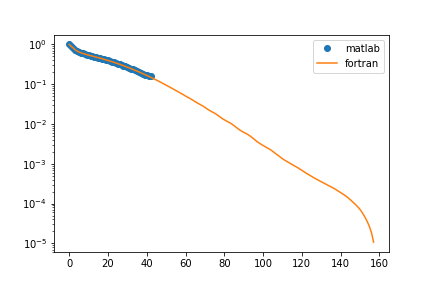

('reff=', 26.0)
('wnum=', 1929.4292)


In [12]:
i_reff = 23
i_wnum = 2000

N_frommatlab = matNpmom['Npmomarray'][i_wnum,i_reff]; print "from matlab", N_frommatlab
n_frommatlab = [i for i in range(N_frommatlab)]
p_frommatlab = np.squeeze(matpmom['pmomarray'][n_frommatlab,i_wnum,i_reff])

N_fromfortran = Npmomarray[i_reff,i_wnum]; print "from fortran", N_fromfortran
n_fromfortran = [i for i in range(N_fromfortran)] 
p_fromfortran = np.squeeze(pmomarray[i_reff,i_wnum,n_fromfortran])

plt.figure()
plt.semilogy(n_frommatlab,p_frommatlab,'o',n_fromfortran,p_fromfortran)
plt.legend(['matlab', 'fortran'])
plt.show()

print('reff=',np.squeeze(reff_list)[i_reff])
print('wnum=',np.squeeze(wnum_list)[i_wnum])